# Avance 2. Ingeniería de Características

### Integrantes:

- **A01794940** José de Jesús Peña Rodríguez.  
- **A01283104** Kevin Dueñas Aguirre.  
- **A01794191** Juan Antonio Chiñas Mata.


In [102]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import functions

# Reading CSV file from local route

In [103]:
warnings.filterwarnings("ignore")

In [104]:
CSV_PATH = "dataset/Datos_Imgenes.csv"
df = pd.read_csv(read_csv(CSV_PATH))

## Data Preprocessing  
Based on a preliminary session with our tutor, we identified several columns that either lacked relevant information or contained redundant data already present in other columns. Consequently, we decided to remove the following columns:  

- `index`  
- `date`  
- `page`  
- `TotalPages`  
- `ModelApplied`  
- `Details`  
- `ModelReported`  

## Project Objective  
For this project, it was explicitly required to develop a solution and analysis to identify groups of documents acquired by different machine learning models.  

### Machine Learning Models  
The models involved in this process are:  

- `Model`  
- `Estado_cuenta`  
- `Recibo_nomina`  
- `INE`  
- `Comprobante_domicilio`  
- `Carta_libranza`

In [105]:
columns_to_delete = ["Index", "Date", "Page", "TotalPages","ModelApplied", "Details","ModelReported"]
df = df.drop(columns=columns_to_delete, axis=1)

# Creating a filter on Model column 

## Data Filtering and Preparation  

In the following cells, we will apply filters to our base dataframe `df`, to extract a new dataframe called `models`.  

The `models` dataframe will allow us to apply further filtering and generate new dataframes, each containing the necessary information for clustering.  


In [106]:
models = df["Model"].value_counts()
models

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64

## Filtered Dataframes  

By applying filters, we can generate new observations and create specific dataframes based on relevant criteria.  

- **`df_edo_cta`**: This dataframe will contain at least four distinct values in the `ClassId` column: `TXT`, `APP`, `SUC`, and `ATM`.  
- **`df_nom`**: This dataframe will have exactly four distinct values, using `DocType` as the reference column.  
- **`df_ine`**: This dataframe will contain only two distinct values, taking `DocType` as the reference column.  
- **`df_addy`**: This dataframe will include six different values, using `DocType` as the reference column.  



## Displaying all diferent values in:
- `estado_cuenta`  
- `recibo_nomina`  
- `ine`  
- `comprobante_domicilio`  

In [107]:
df_edo_cta = col_filter(df, "Model", "estado_cuenta")
df_nom = col_filter(df, "Model", "recibo_nomina")
df_ine = col_filter(df, "Model", "ine")
df_addy = col_filter(df, "Model", "comprobante_domicilio")

In [108]:
print(df_edo_cta["ClassId"].value_counts())
print("---")
print(df_nom["DocType"].value_counts())
print("---")
print(df_ine["DocType"].value_counts())
print("---")
print(df_addy["DocType"].value_counts())

ClassId
TXN    26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64
---
DocType
IMSS      5453
ISSSTE    2077
SEP       1360
PEMEX      865
IMSS3      438
Name: count, dtype: int64
---
DocType
INE     9336
PASS      10
Name: count, dtype: int64
---
DocType
CFE      4512
AGUA      726
TEL       224
CABLE     179
CONST      78
GAS        61
Name: count, dtype: int64


# PREPROCESING PER MODEL 

<small>

## Clustering Procedure for Each Model  

After obtaining `df_edo_cta`, we will apply the same clustering procedure to the remaining models.  

### 1. Dropping Unnecessary Columns  
- For `df_edo_cta`, we will drop only the `Models` column.  
- For the other dataframes, we will drop both the `Models` and `ClassId` columns since the relevant information is contained in `DocType`.  

### 2. Encoding Categorical Variables  
- For `df_edo_cta`, we will apply One-Hot Encoding to the `ClassicId` column for clustering.  
- For the remaining models, we will apply One-Hot Encoding to the `DocType` column.  

### 3. Selecting Variables for Clustering  
- The following variables will be used to define the clusters:  
  - `Sharpness`  
  - `Contrast`  
  - `Clarity`  
  - `Resolution`  

### 4. Determining the Optimal Number of Clusters  
- We will use the **Within-Cluster Sum of Squares (WCSS)** method to identify the best number of clusters for each model.  
- K-Means clustering will be run for values ranging from 1 to 10 clusters.  
- An elbow plot will be generated to visualize and determine the optimal number of clusters.  

### 5. Validating the Clusters  
- After identifying the optimal number of clusters, we will validate the results by comparing them to the distinct values from the previous filtering step for each model.  

### 6. Visualizing the Clusters  
- Finally, once the correct number of clusters has been confirmed, we will generate cluster plots for each model to visualize the results.  

**Note**: Since there are five different models, the optimal number of clusters may vary for each one.  

</small>


In [109]:
df_edo_cta.drop(columns="Model", inplace=True)
df_nom.drop(columns=["Model","ClassId"], inplace=True)
df_ine.drop(columns=["Model","ClassId"], inplace=True)
df_addy.drop(columns=["Model","ClassId"], inplace=True)

## Model- Estado cuenta

### Codification OneHot for categorical columns

In [110]:
df_edo_cta = pd.get_dummies(df_edo_cta, columns=["ClassId"], drop_first=False)
df_edo_cta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34140 entries, 4 to 62887
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  34140 non-null  int64  
 1   Fields          34140 non-null  int64  
 2   EmptyFields     34140 non-null  int64  
 3   ConfR           34140 non-null  float64
 4   ConfA           34140 non-null  float64
 5   ConfW           34140 non-null  float64
 6   Sharpness       34140 non-null  float64
 7   Contrast        34140 non-null  float64
 8   Clarity         34140 non-null  float64
 9   Resolution      34140 non-null  float64
 10  DocType         34140 non-null  object 
 11  ClassId_APP     34140 non-null  bool   
 12  ClassId_ATM     34140 non-null  bool   
 13  ClassId_SUC     34140 non-null  bool   
 14  ClassId_TXN     34140 non-null  bool   
dtypes: bool(4), float64(7), int64(3), object(1)
memory usage: 3.3+ MB


## Training the KNSS for Clustering  

In [111]:
list_col = list(df_edo_cta.columns)

X_var=[["Sharpness","Contrast"],
        ["Sharpness","Clarity"],
        ["Sharpness","Resolution"],
        ["Contrast","Clarity"],
        ["Contrast","Resolution"],
        ["Clarity","Resolution"]]

In [112]:
X_pairs = pairs_x(list_col, X_var) 

In [113]:
X_edo_cta = get_x(X_pairs, df_edo_cta)
edo_cta_wss = wss_list(X_edo_cta)

### Best number of cluster is 4 based on Graphs 

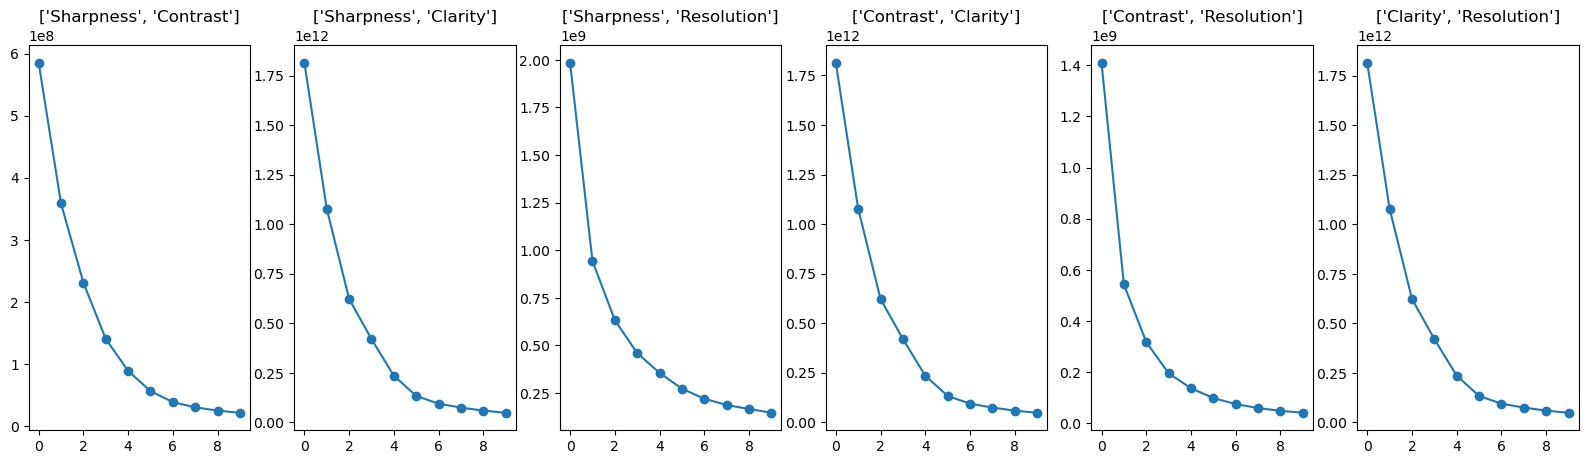

In [115]:
plt_elbow(edo_cta_wss,X_var)

### KNSS Training

In [116]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_edo_cta[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_edo_cta[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_edo_cta[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_edo_cta[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_edo_cta[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_edo_cta[5]) #  ['Clarity', 'Resolution']

y_edo_cta = [y_0, y_1, y_2, y_3, y_4,y_5]


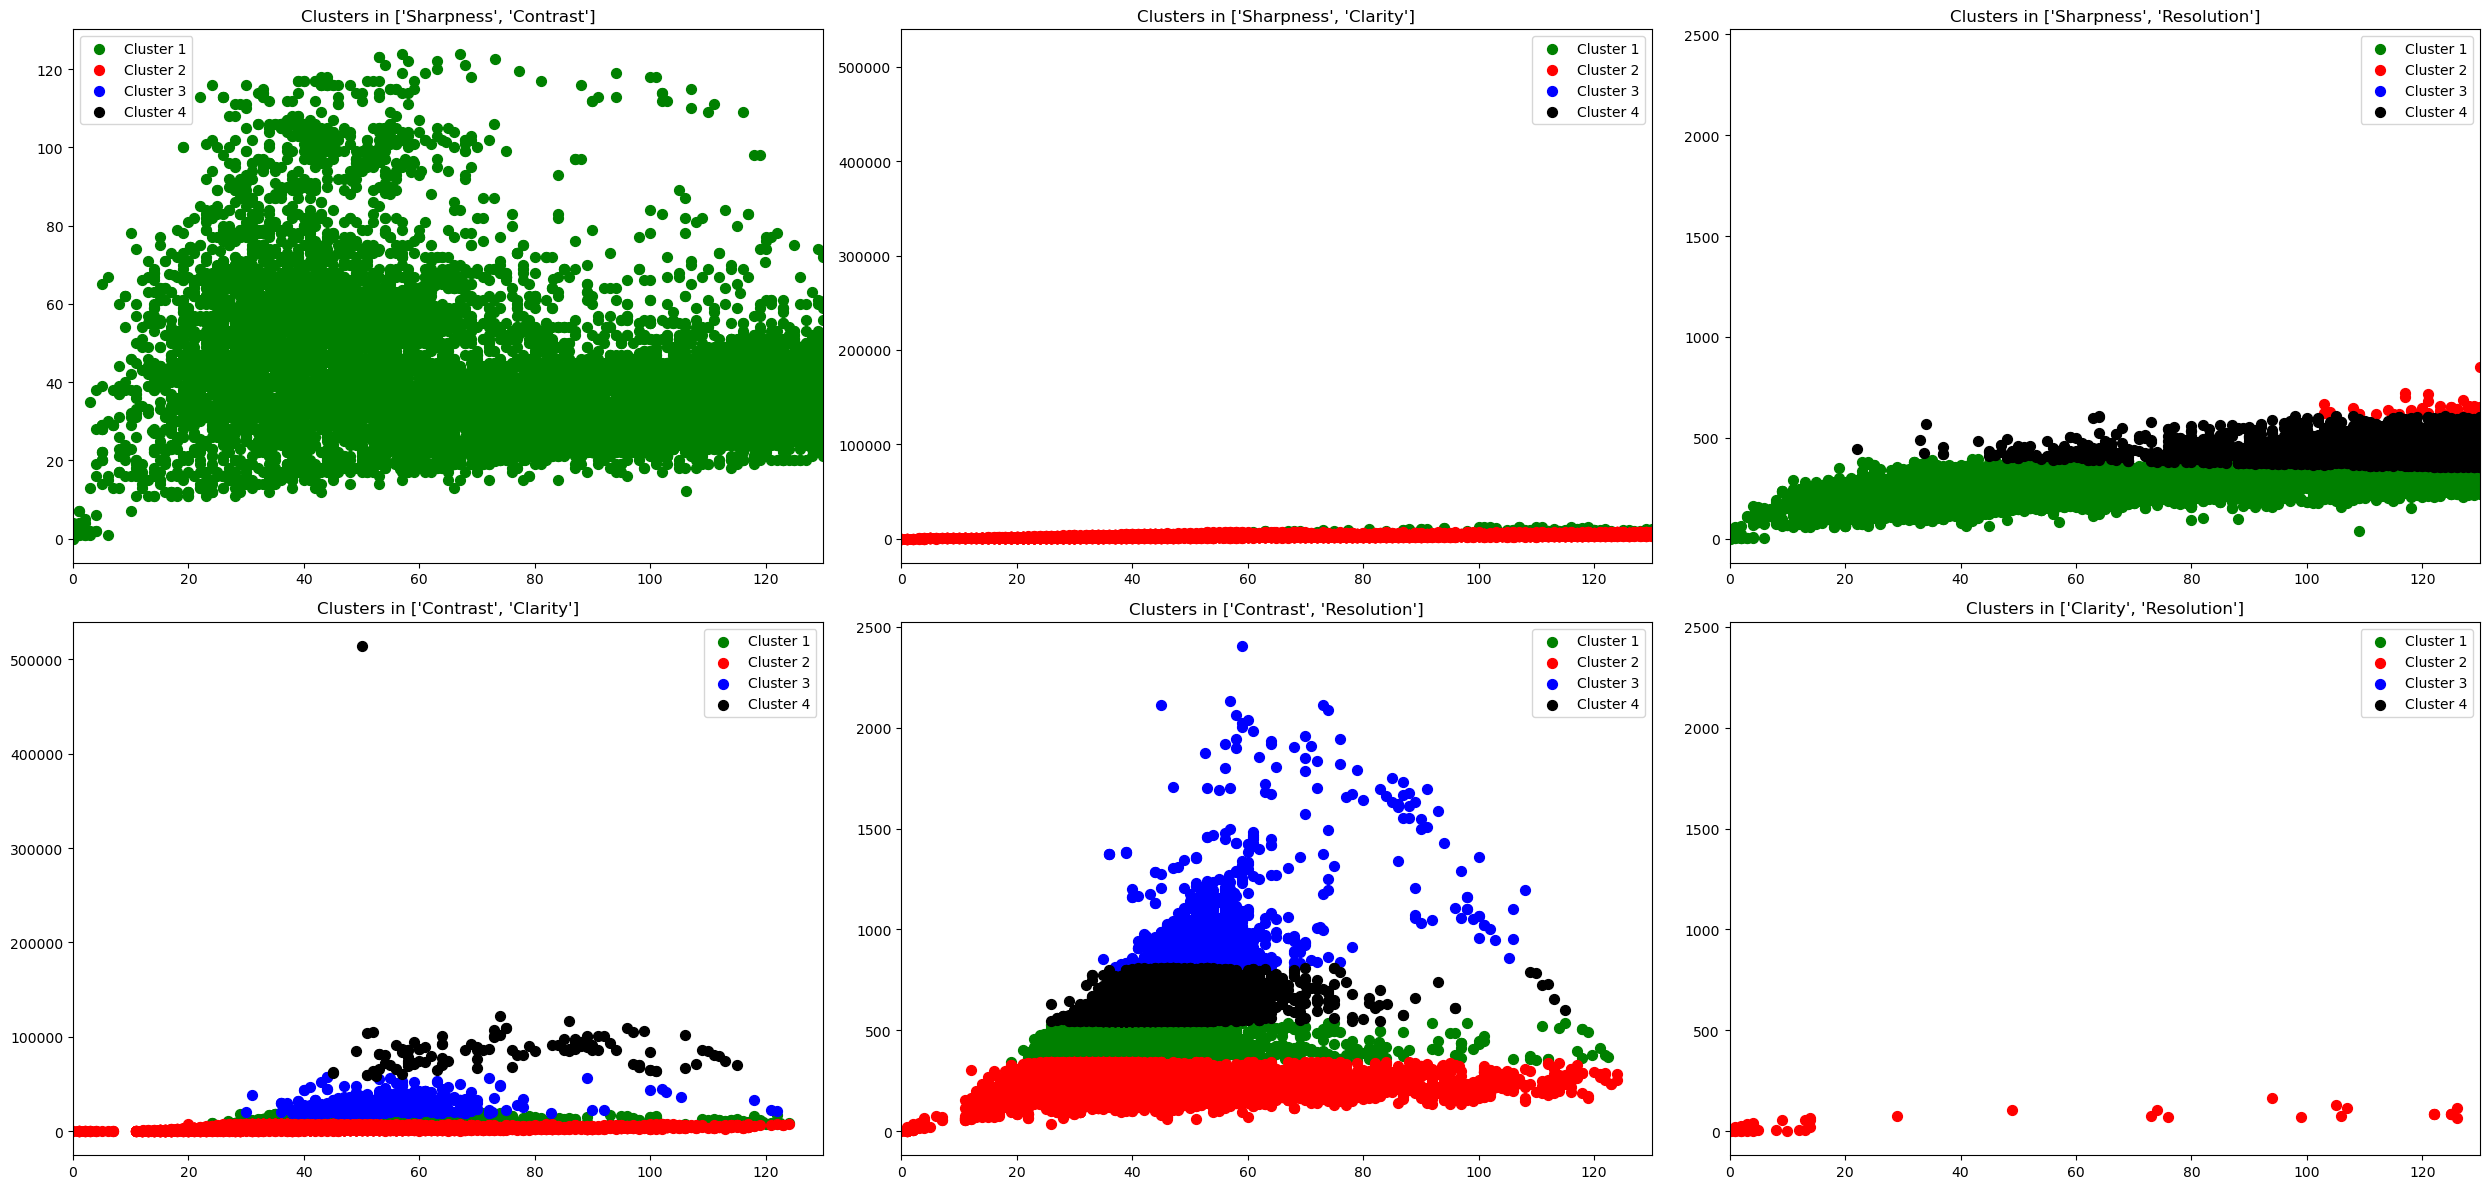

In [117]:
plot_clusters(4, X_edo_cta,y_edo_cta, X_var)

The clustering effectively separates the Estado Cuenta data into four distinct groups, with varying patterns in Contrast and Resolution. This suggests meaningful differences in document characteristics, and the clusters can provide valuable insights for further analysis or classification tasks.

## Model- Recibo de Nomina

### Codification OneHot for categorical columns

In [118]:
df_nom = pd.get_dummies(df_nom, columns=["DocType"], drop_first=False)
df_nom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 1 to 62956
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  10193 non-null  int64  
 1   Fields          10193 non-null  int64  
 2   EmptyFields     10193 non-null  int64  
 3   ConfR           10193 non-null  float64
 4   ConfA           10193 non-null  float64
 5   ConfW           10193 non-null  float64
 6   Sharpness       10193 non-null  float64
 7   Contrast        10193 non-null  float64
 8   Clarity         10193 non-null  float64
 9   Resolution      10193 non-null  float64
 10  DocType_IMSS    10193 non-null  bool   
 11  DocType_IMSS3   10193 non-null  bool   
 12  DocType_ISSSTE  10193 non-null  bool   
 13  DocType_PEMEX   10193 non-null  bool   
 14  DocType_SEP     10193 non-null  bool   
dtypes: bool(5), float64(7), int64(3)
memory usage: 925.7 KB


In [119]:
X_nom = get_x(X_pairs, df_nom)
nom_wss = wss_list(X_nom)

### Best number of cluster is 5 based on Graphs 

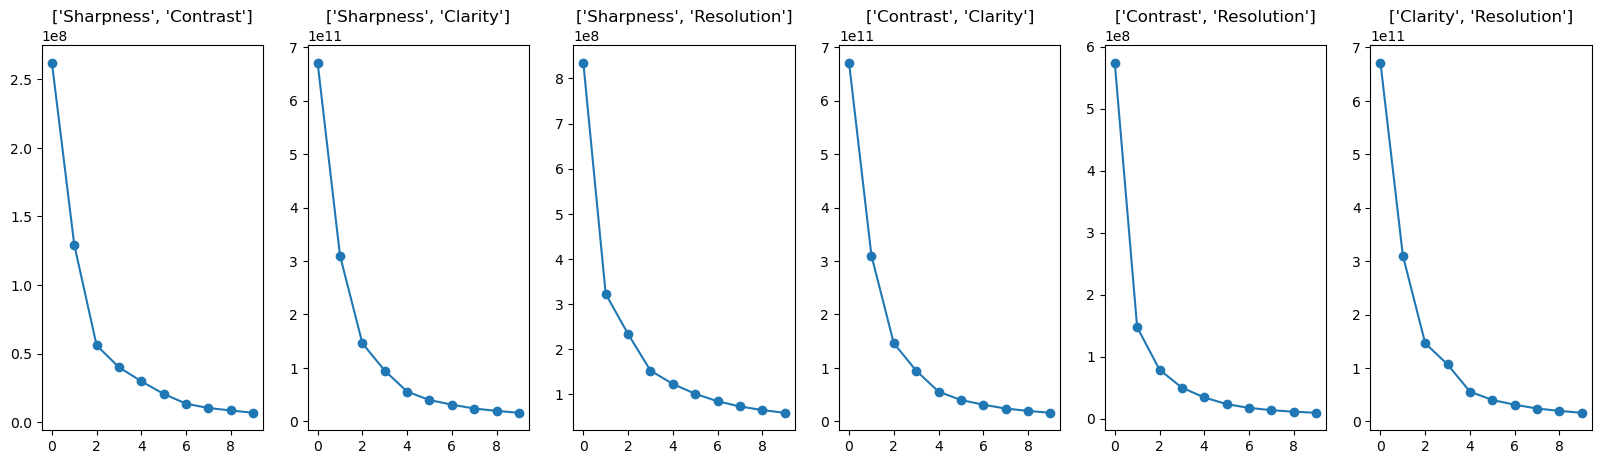

In [120]:
plt_elbow(nom_wss,X_var)

The clustering of Recibo Nomina data using Contrast, Resolution, Sharpness and Clarity reveals four clear groups, indicating meaningful separations in the dataset. The compact clusters and distinct centroids suggest that the k-means model effectively captured the data structure. These results highlight the relevance of the chosen features and provide a basis for further categorization or validation.

In [121]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_nom[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_nom[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_nom[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_nom[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_nom[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_nom[5]) #  ['Clarity', 'Resolution']

y_nom = [y_0, y_1, y_2, y_3, y_4,y_5]

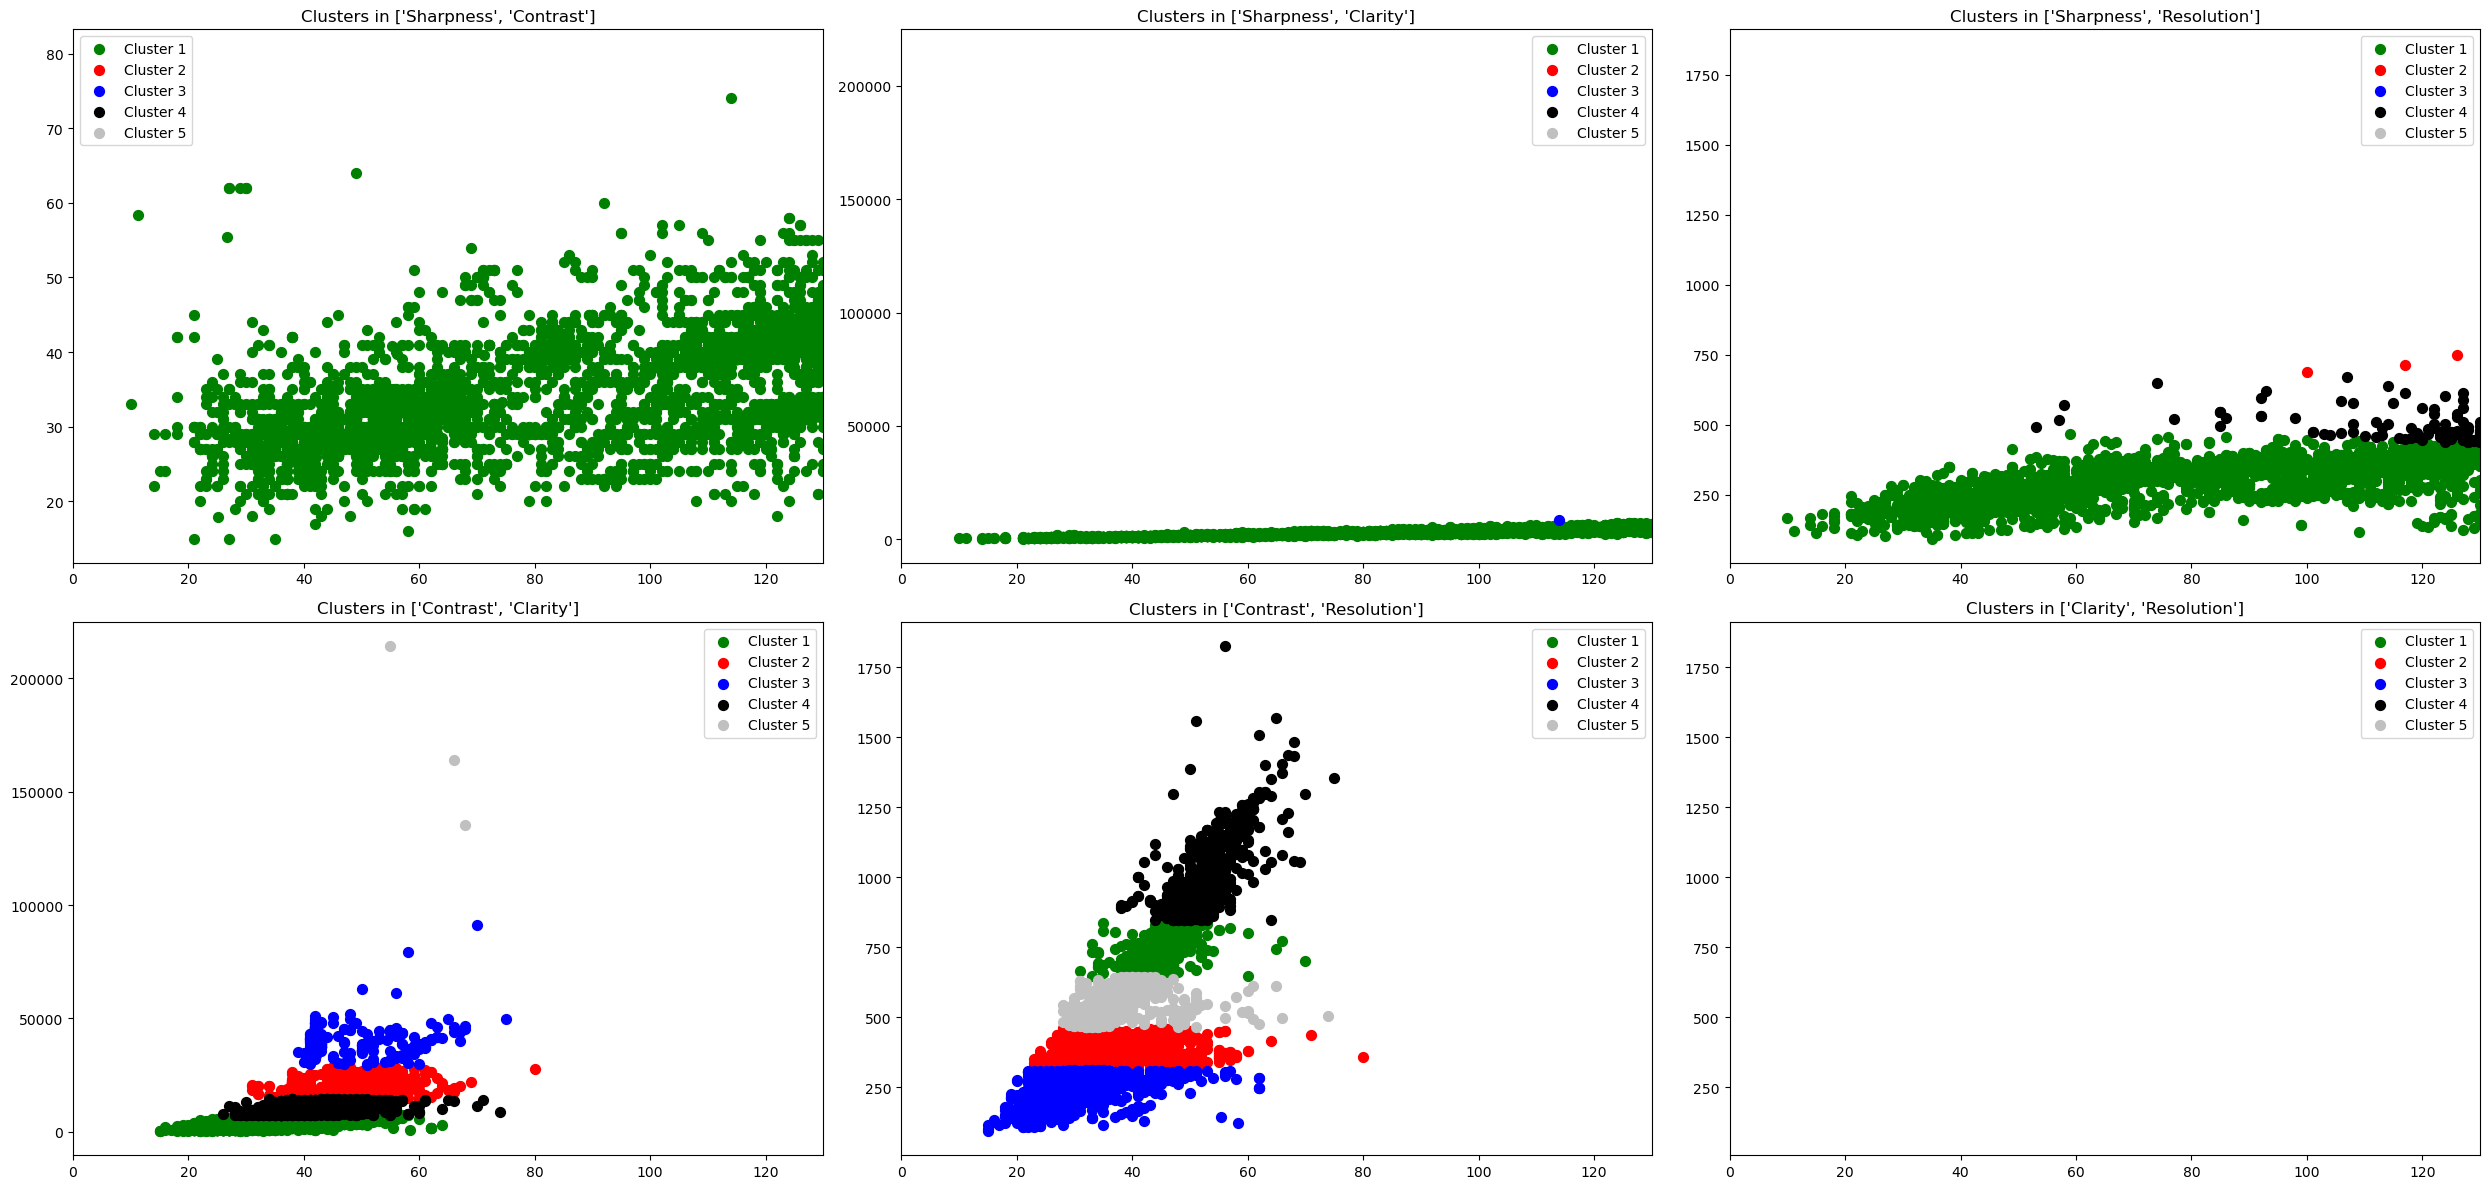

In [122]:
plot_clusters(5, X_nom,y_nom, X_var)

## Model- INE

clusters the INE data using the Contrast (X-axis) and Resolution (Y-axis) features with the k-means algorithm. It calculates the WCSS for 1 to 10 clusters to determine the optimal number of clusters and selects 2 clusters (n_clusters=2). The data points are plotted, with each cluster represented by distinct colors (green and red), and the cluster centroids are highlighted in yellow.

In [123]:
df_ine = pd.get_dummies(df_ine, columns=["DocType"], drop_first=False)
df_ine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9346 entries, 3 to 62959
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  9346 non-null   int64  
 1   Fields          9346 non-null   int64  
 2   EmptyFields     9346 non-null   int64  
 3   ConfR           9346 non-null   float64
 4   ConfA           9346 non-null   float64
 5   ConfW           9346 non-null   float64
 6   Sharpness       9346 non-null   float64
 7   Contrast        9346 non-null   float64
 8   Clarity         9346 non-null   float64
 9   Resolution      9346 non-null   float64
 10  DocType_INE     9346 non-null   bool   
 11  DocType_PASS    9346 non-null   bool   
dtypes: bool(2), float64(7), int64(3)
memory usage: 821.4 KB


In [124]:
X_ine = get_x(X_pairs, df_ine)
ine_wss = wss_list(X_ine)

### Best number of cluster is 2 based on Graphs 

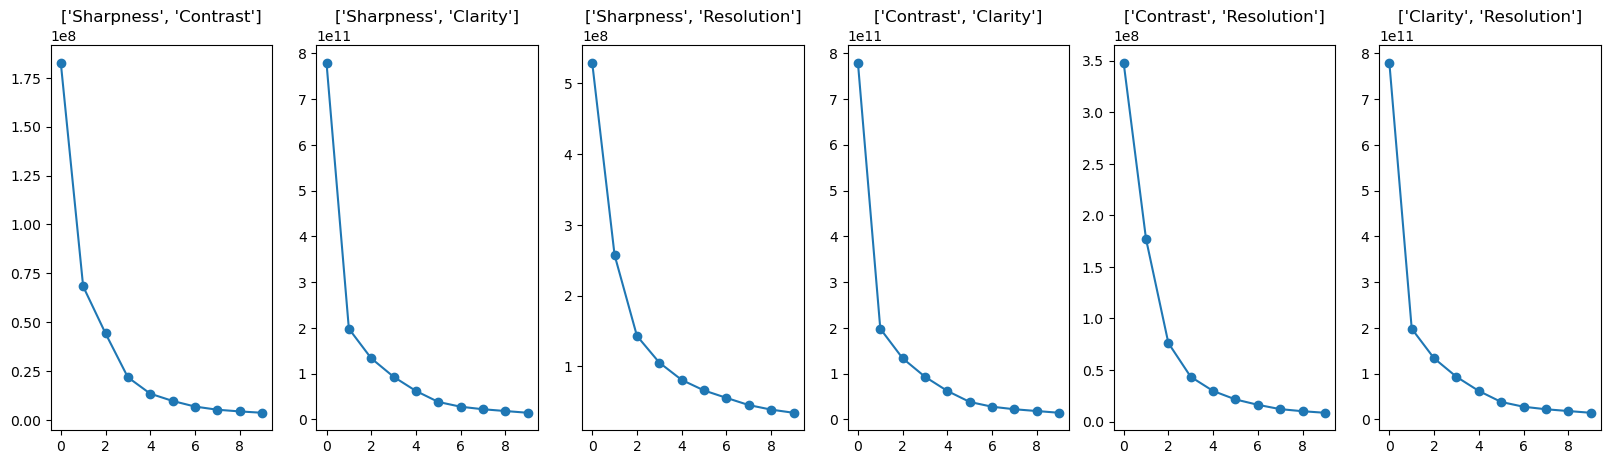

In [125]:
plt_elbow(ine_wss,X_var)

### KNSS Training

In [126]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_ine[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_ine[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_ine[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_ine[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_ine[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_ine[5]) #  ['Clarity', 'Resolution']

y_ine = [y_0, y_1, y_2, y_3, y_4,y_5]

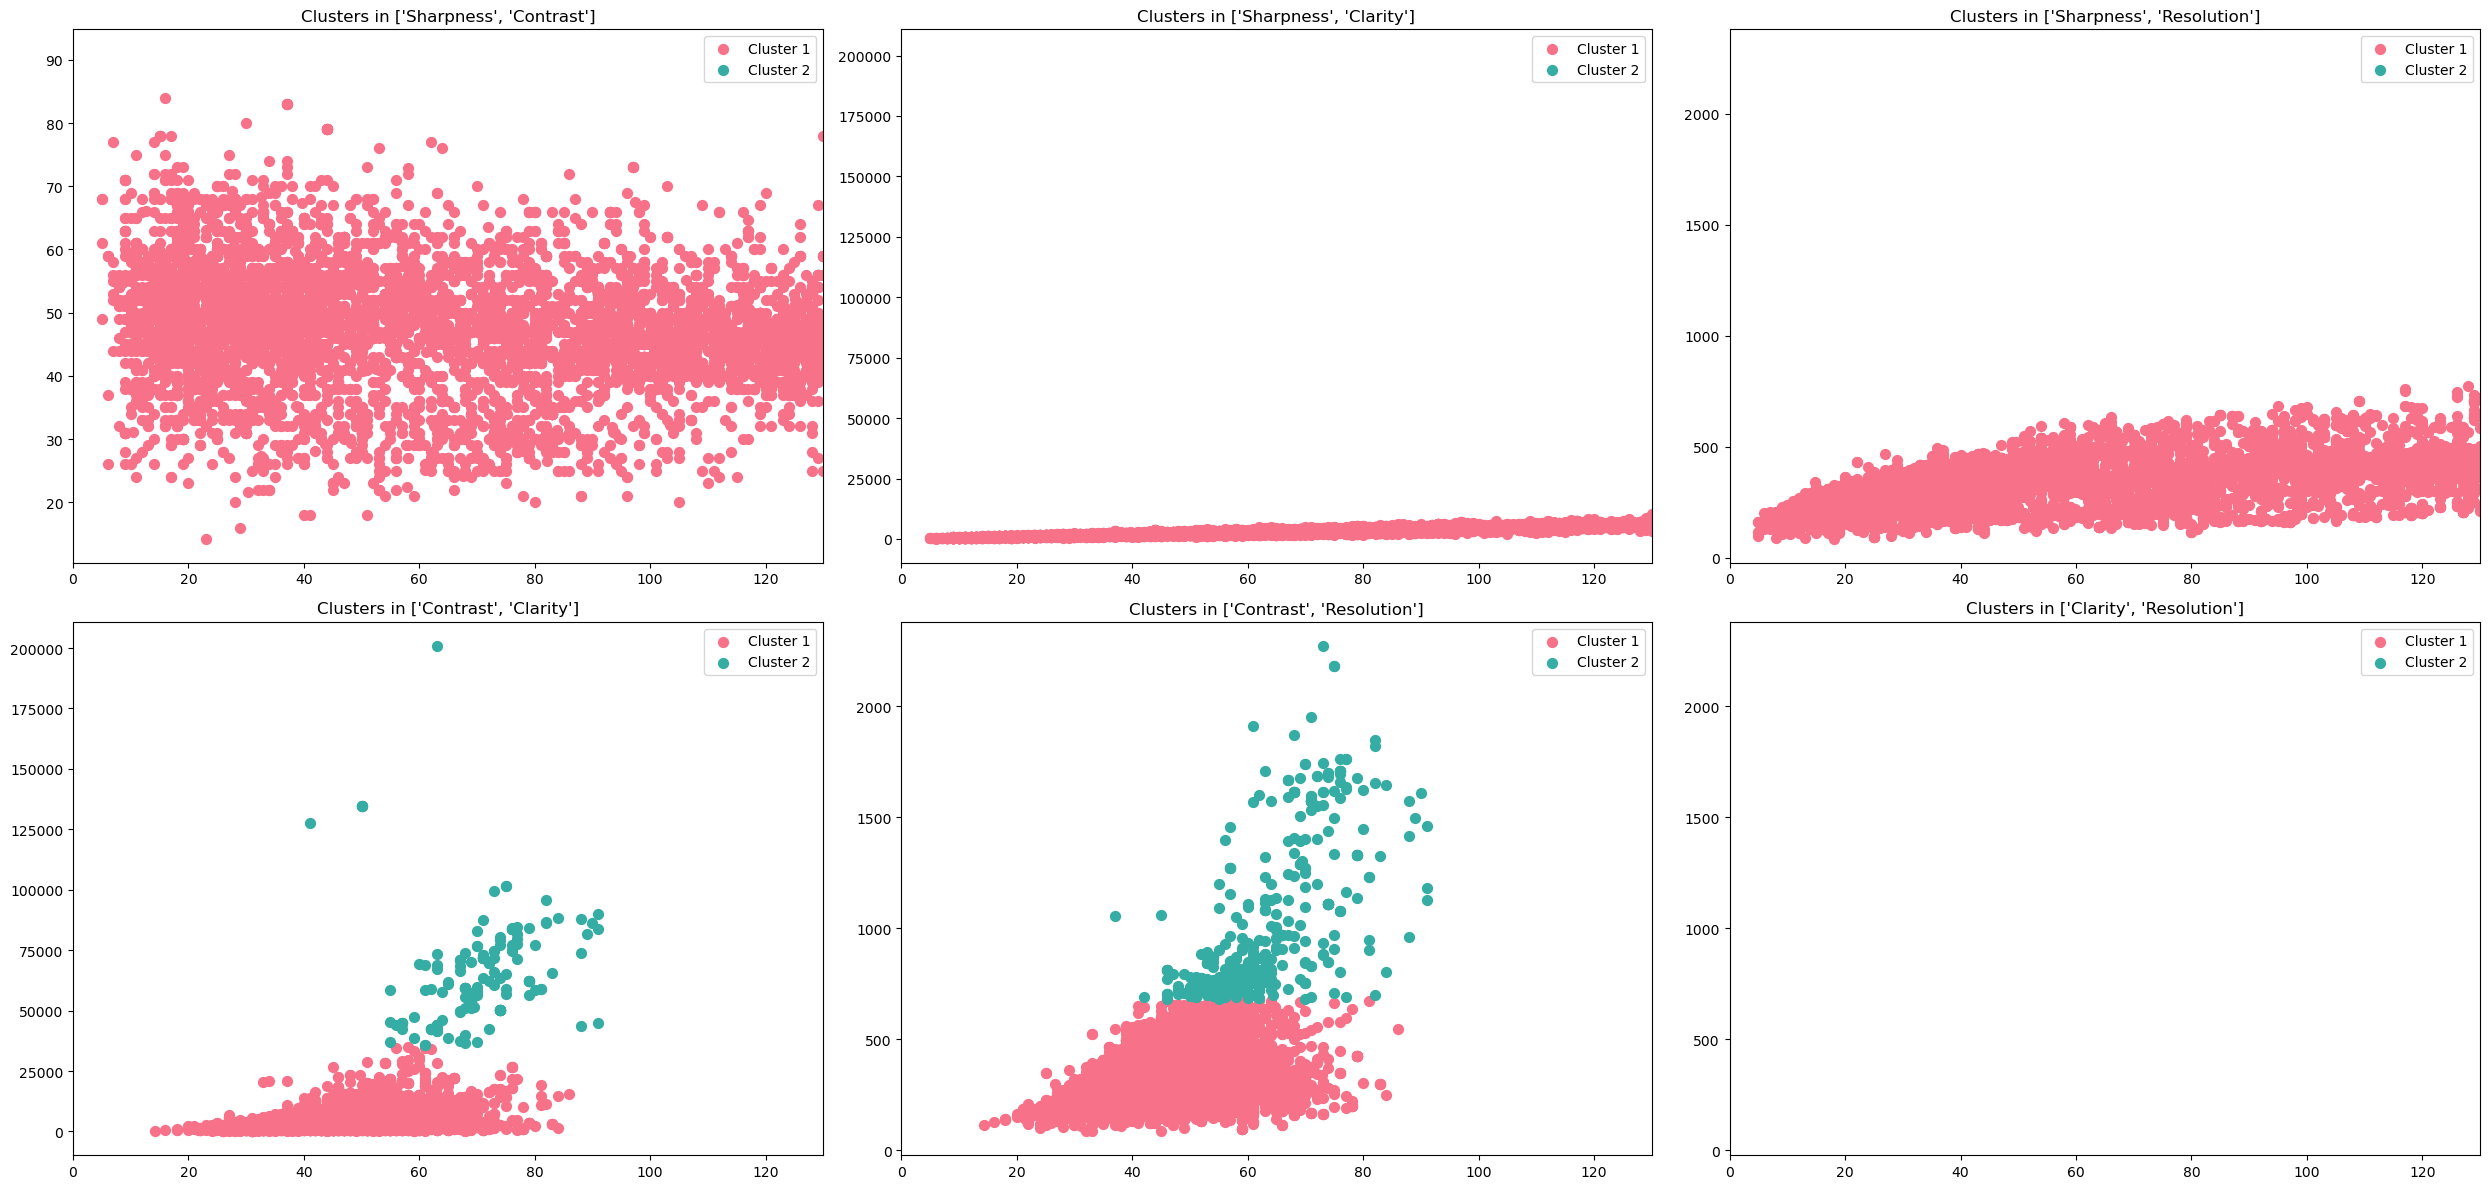

In [127]:
plot_clusters(2, X_ine,y_ine, X_var)

Results shows two distinct groups based on Contrast and Resolution. The clusters are well-separated, indicating clear differences in the data distribution. This separation could provide insights into distinct patterns within the INE data and support further classification or analysis.

## Model- Comprobante de domicilio

In [128]:
df_addy = pd.get_dummies(df_addy, columns=["DocType"], drop_first=False)
df_addy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5780 entries, 0 to 61619
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  5780 non-null   int64  
 1   Fields          5780 non-null   int64  
 2   EmptyFields     5780 non-null   int64  
 3   ConfR           5780 non-null   float64
 4   ConfA           5780 non-null   float64
 5   ConfW           5780 non-null   float64
 6   Sharpness       5780 non-null   float64
 7   Contrast        5780 non-null   float64
 8   Clarity         5780 non-null   float64
 9   Resolution      5780 non-null   float64
 10  DocType_AGUA    5780 non-null   bool   
 11  DocType_CABLE   5780 non-null   bool   
 12  DocType_CFE     5780 non-null   bool   
 13  DocType_CONST   5780 non-null   bool   
 14  DocType_GAS     5780 non-null   bool   
 15  DocType_TEL     5780 non-null   bool   
dtypes: bool(6), float64(7), int64(3)
memory usage: 530.6 KB


In [129]:
X_addy = get_x(X_pairs, df_addy)
addy_wss = wss_list(X_addy)

### Best number of cluster is 6 based on Graphs 

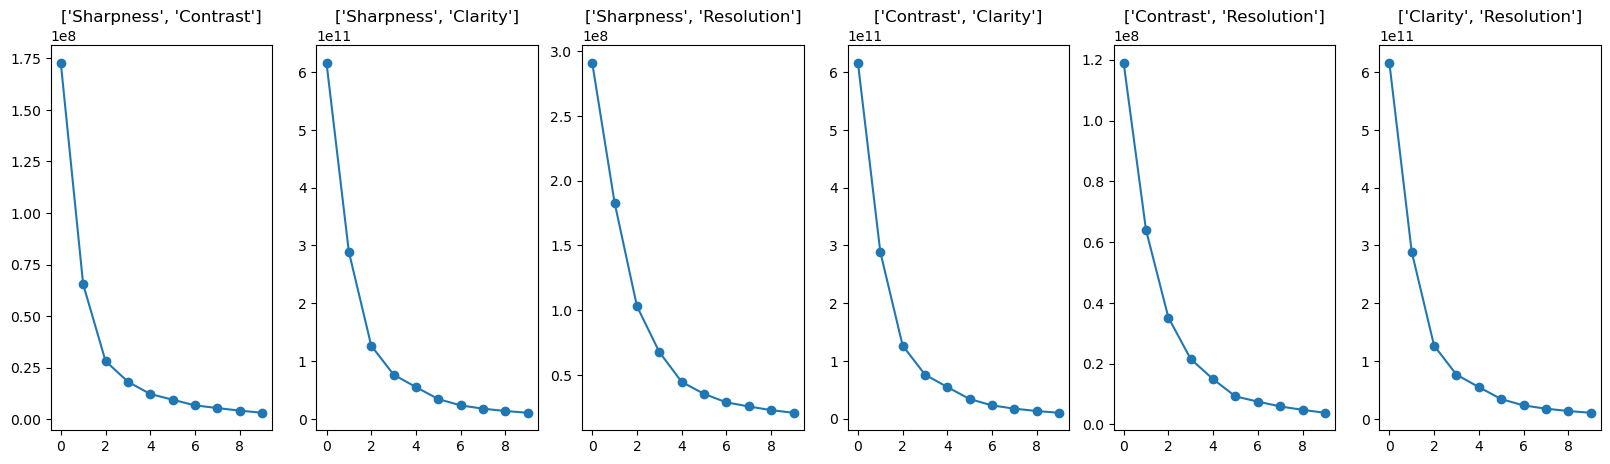

In [130]:
plt_elbow(addy_wss,X_var)

### KNSS Training

In [131]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_addy[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_addy[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_addy[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_addy[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_addy[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_addy[5]) #  ['Clarity', 'Resolution']

y_addy = [y_0, y_1, y_2, y_3, y_4,y_5]

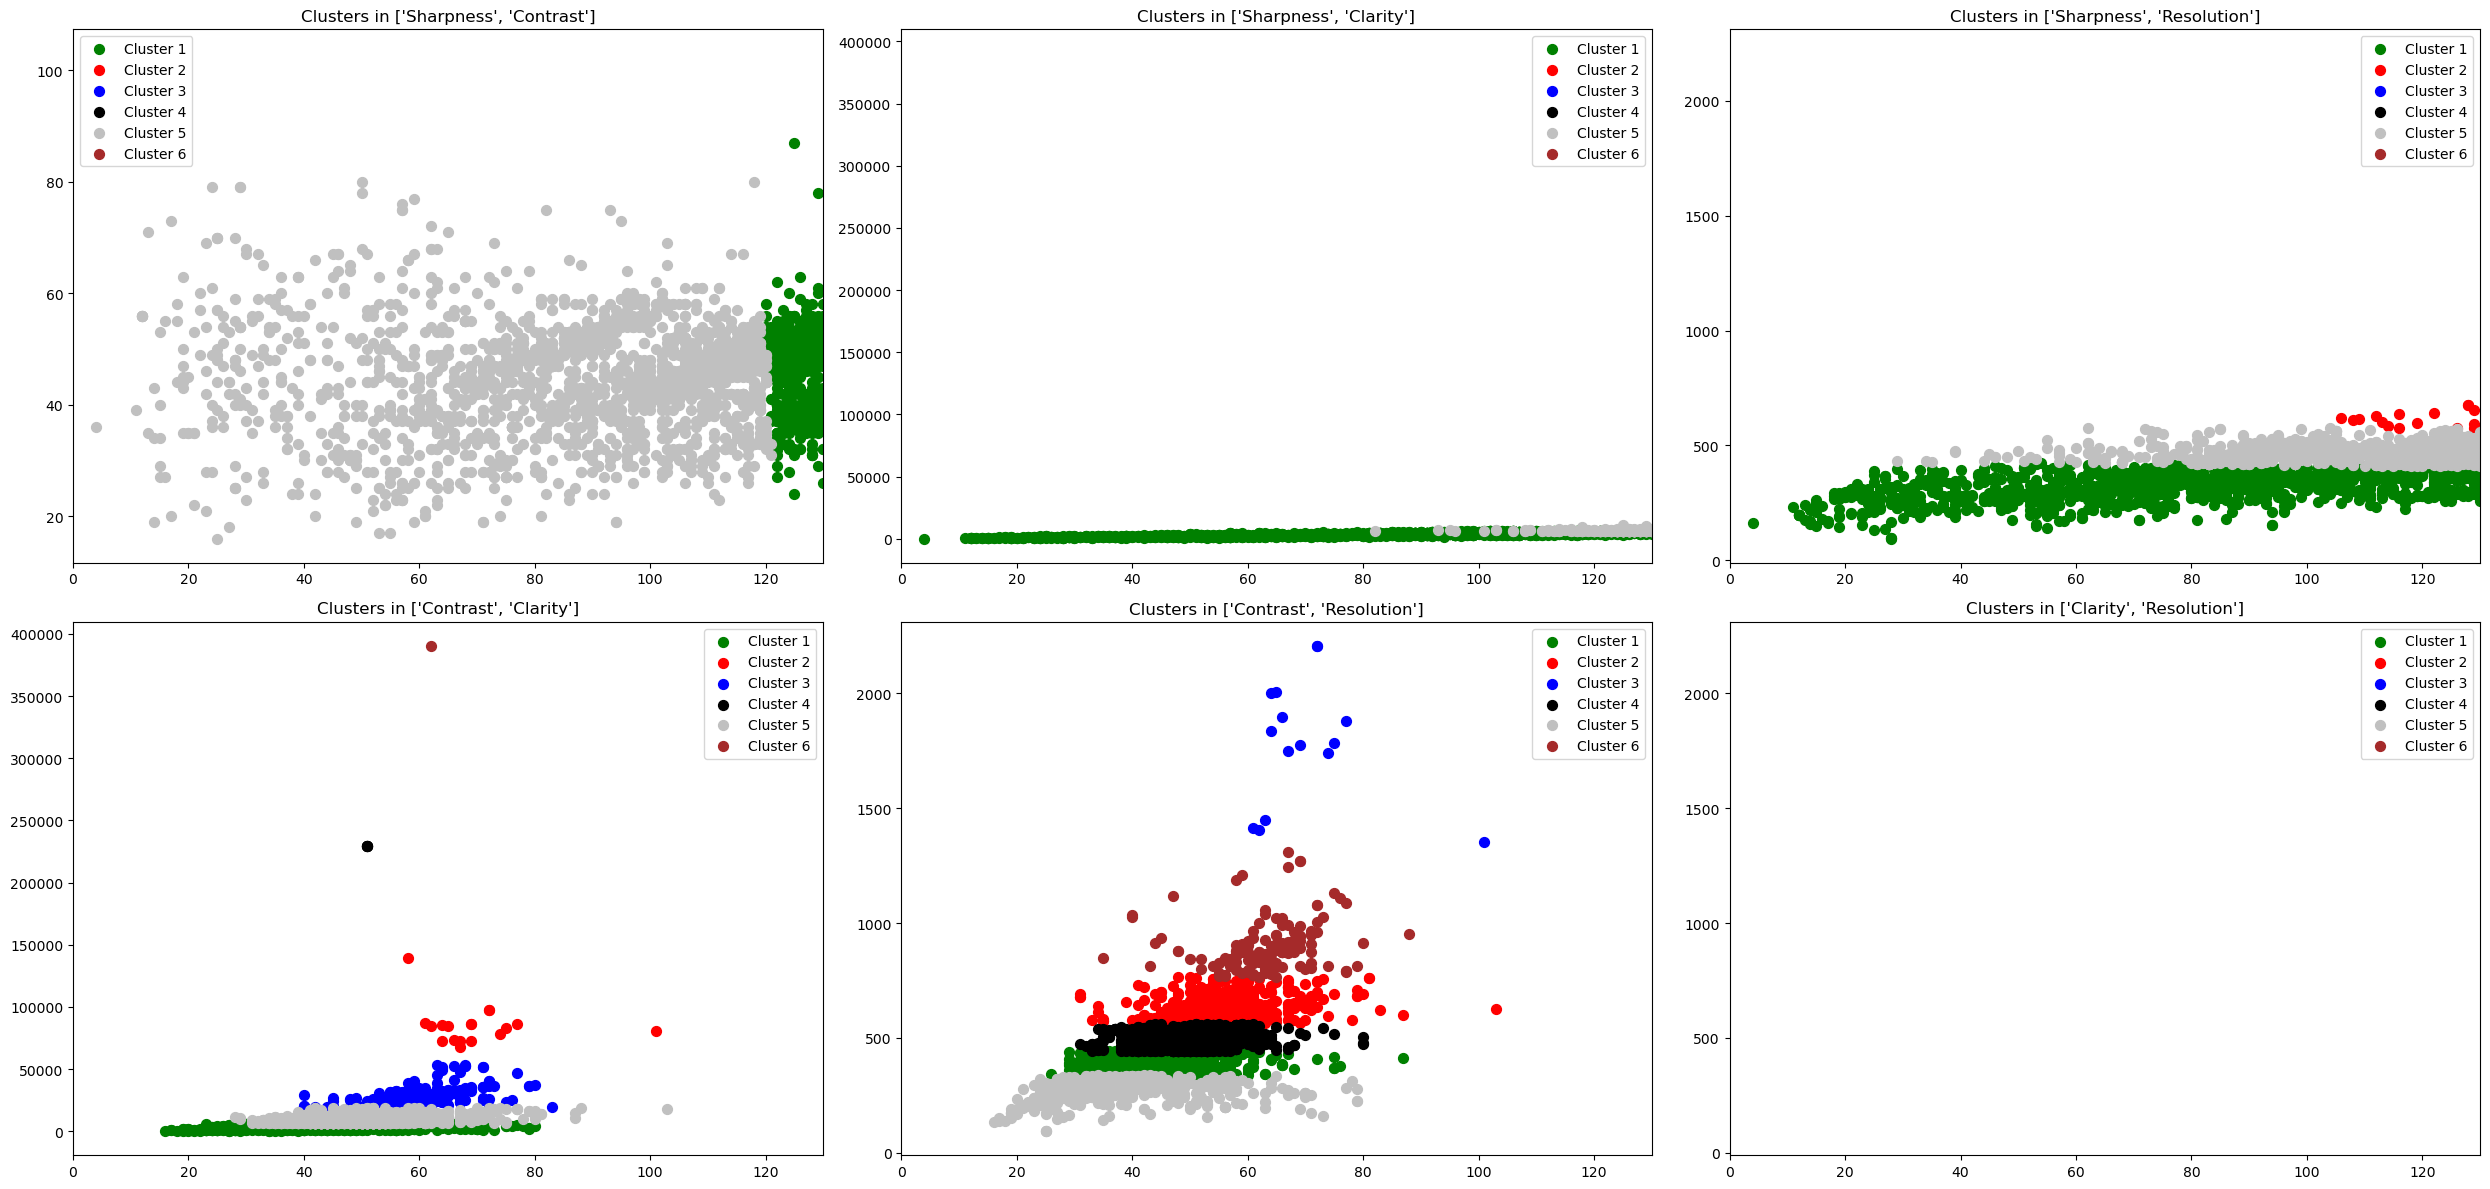

In [132]:
plot_clusters(6, X_addy,y_addy, X_var)

The clustering reveals six distinct groups based on Contrast and Resolution, indicating clear separations in the dataset. This clustering can be used to analyze patterns or similarities within the Comprobante de Domicilio data, providing meaningful insights for classification or further analysis.

## Conclusions

- **No Missing Values**:  
  The dataframe does not contain any missing values, so no additional data imputation was necessary during the process.

- **Outliers and PCA**:  
  The data analysis verified that the information in the dataframe does not contain significant outliers. After applying Principal Component Analysis (PCA) on the entire dataframe, we found that the current columns explain more than 80% of the variation in our model. This analysis is documented in the `FE_transformation.ipynb` file located in this folder.

- **Categorical Data Encoding**:  
  Since we are applying clustering, One-Hot Encoding was chosen for categorical variables, as it has shown good results when used in conjunction with clustering algorithms.

- **WCSS for Clustering**:  
  While WCSS (Within-Cluster Sum of Squares) is not listed as a recommended feature engineering method for this activity, it played a crucial role in ensuring that the number of clusters chosen for each model was the most optimal.

- **KMeans Clustering Implementation**:  
  We started implementing model training based on KMeans clustering to assess the cluster performance across our models. The results so far are promising in terms of correct distributions, but there are still a few aspects that need to be confirmed with our tutor. Some of the questions we intend to discuss include:
  
    1. Our preliminary clustering analysis using KMeans shows good results, but we are only plotting two variables (Resolution and Contrast) for all models. Is it necessary to demonstrate clustering performance with additional variables?
    
    2. Besides KMeans, are there other clustering methods you would recommend exploring to further differentiate the performance of the models?
